In [324]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skbio.stats.composition import ilr,clr,alr
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
dataframe = pd.DataFrame(pd.read_csv("./station_day.csv"))
dataframe = dataframe.dropna()
dataframe.head()

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
5,AP001,2017-11-29,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0,Moderate


In [326]:
#columns_to_select = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
columns_to_select = ['PM2.5','PM10','O3','NO2','SO2','CO']
df = dataframe[columns_to_select]
df.head()

,PM2.5,PM10,O3,NO2,SO2,CO
1,81.40,124.50,127.09,20.50,15.24,0.12
2,78.32,129.06,117.44,26.00,26.96,0.14
3,88.76,135.32,111.81,30.85,33.59,0.11
4,64.18,104.09,138.18,28.07,19.00,0.09
5,72.47,114.84,109.74,23.20,10.55,0.16


In [327]:
# Chuyển đổi các giá trị để tổng mỗi hàng bằng 1
df = df.div(df.sum(axis=1), axis=0)*100
df.head()



,PM2.5,PM10,O3,NO2,SO2,CO
1,22.068592,33.753558,34.455741,5.557815,4.131761,0.032534
2,20.723963,34.150085,31.075360,6.879763,7.133785,0.037045
3,22.165618,33.792828,27.921786,7.704026,8.388273,0.027470
4,18.149939,29.436385,39.076949,7.938124,5.373151,0.025452
5,21.896906,34.699057,33.158086,7.009911,3.187696,0.048344


In [328]:
# Chuyển đổi CLR
clr_transformed = clr(df + 1e-10)  # Thêm một giá trị nhỏ để tránh log(0)

# Chuyển đổi thành DataFrame
clr_df = pd.DataFrame(clr_transformed, columns=columns_to_select)

# Xác định biến đầu ra

# Loại bỏ các điểm bất thường
y = clr_df['CO']
clr_df = clr_df.drop('CO', axis=1)

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(clr_df, y, test_size=0.3, random_state=42)

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

clr_df.head()

,PM2.5,PM10,O3,NO2,SO2
0,1.450598,1.875529,1.896119,0.071648,-0.224853
1,1.265245,1.764720,1.670370,0.162539,0.198797
2,1.344858,1.766564,1.575723,0.288058,0.373150
3,1.227242,1.710806,1.994107,0.400251,0.009989
4,1.384419,1.844786,1.799360,0.245398,-0.542628


In [329]:
# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Kiểm tra số dòng của DataFrame
num_rows = df.shape[0]
print(f"Số dòng của DataFrame hiện tại là: {num_rows}")

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Số dòng của DataFrame hiện tại là: 10314
Mean Squared Error: 4.2571885535575206e-30
R^2 Score: 1.0


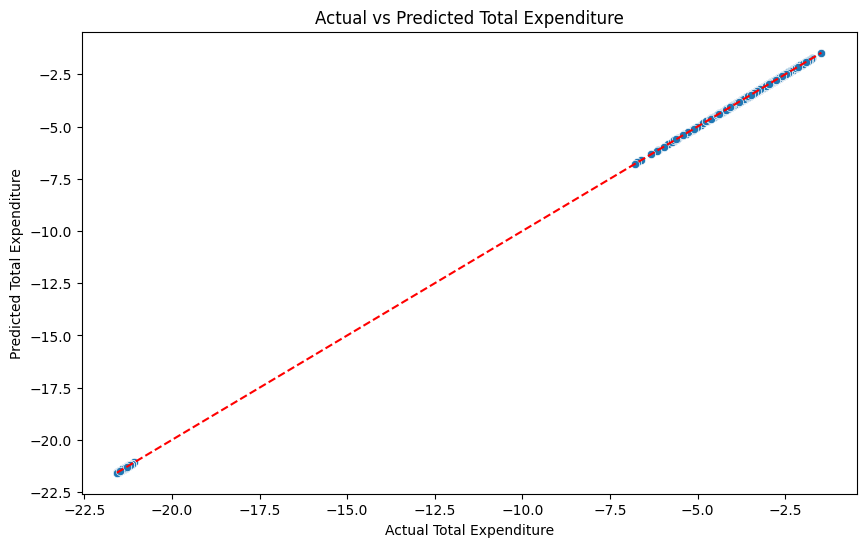

In [330]:
# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

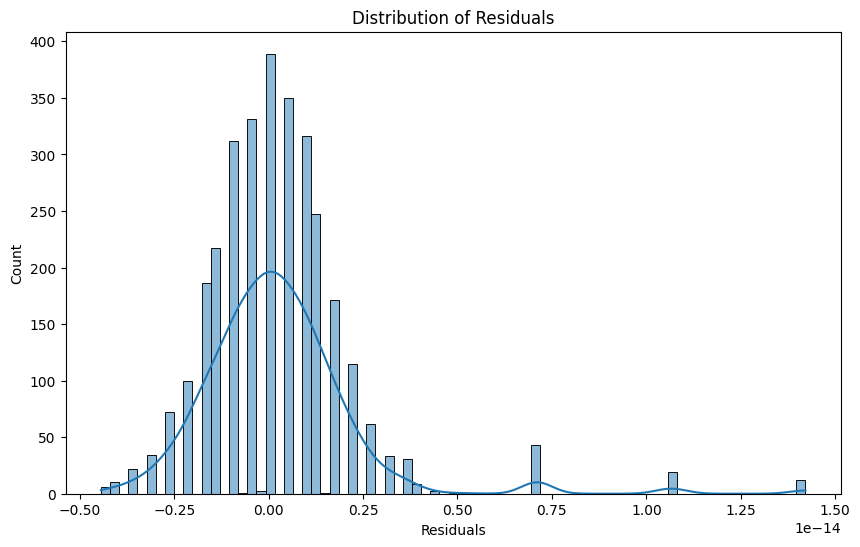

In [331]:
# Vẽ biểu đồ phân phối phần dư
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

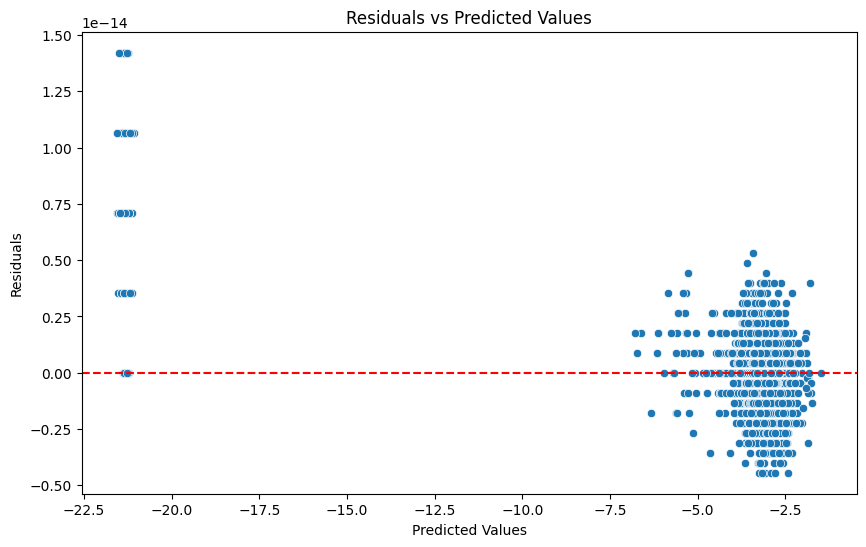

In [332]:
# Vẽ biểu đồ Residuals vs Predicted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [333]:
# Chuyển đổi ILR
ilr_transformed = ilr(data_food + 1e-10)

# Chuyển đổi thành DataFrame
ilr_df = pd.DataFrame(ilr_transformed)
ilr_df.head()

NameError: name 'data_food' is not defined

In [ ]:
# Chọn một biến tham chiếu, ví dụ, biến cuối cùng
alr_transformed = alr(data_food + 1e-10, denominator_idx=-1)

# Chuyển đổi thành DataFrame
alr_columns = [f'{col}/denominator' for col in eat_and_drink[:-1]]
alr_df = pd.DataFrame(alr_transformed, columns=alr_columns)
alr_df.head()

NameError: name 'data_food' is not defined

Số dòng của DataFrame hiện tại là: 10314
Mean Squared Error: 3221.7135043268468
R^2 Score: 0.3699764861203769


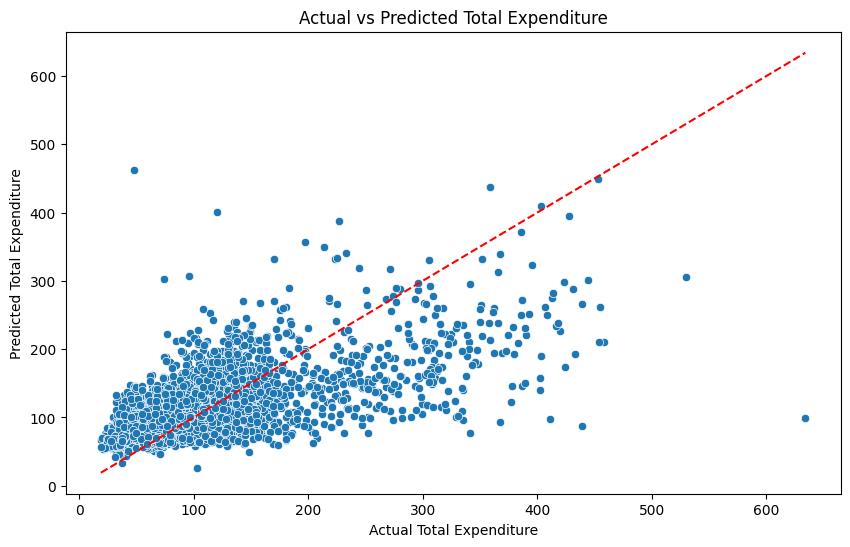

In [ ]:
#mô hình không sử dụng CoDA
# Loại bỏ các điểm bất thường
y = dataframe['CO']

columns_to_select = ['PM2.5','PM10','O3','NO2','SO2','CO']

df = dataframe[columns_to_select]
df.drop('CO', axis=1)
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

# Kiểm tra số dòng của DataFrame
num_rows = df.shape[0]
print(f"Số dòng của DataFrame hiện tại là: {num_rows}")

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Vẽ biểu đồ Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Total Expenditure')
plt.ylabel('Predicted Total Expenditure')
plt.title('Actual vs Predicted Total Expenditure')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()
